First order GSA assesses cost by considering only one factor at a time. Sobol method has been implemented to conduct GSA. It's a variance based sensitivity analysis. Greater the sobol index, greater it's contribution is towards the varince in cost. It's value is always between 0 and 1. Sobol indices can be defined as the ratio of partial variance to the total variance of cost.

In this example, we will study the sensitivity of cell cost to factors such as positive electrode thickness, positive electrode thickness,  negative electrode thickness, number of cells manufactured, positive active material cost, etc.

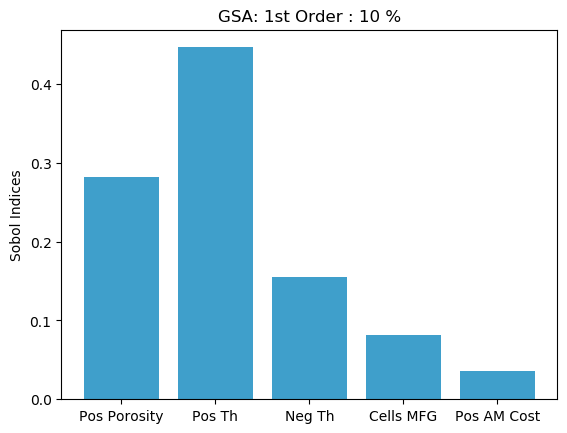

[0.2819593544809477, 0.44626806500819094, 0.15564280580965795, 0.08144501574096936, 0.03640269938314214]

Figure(PyObject <Figure size 640x480 with 0 Axes>)

In [1]:
include("../src/PBCM.jl")

cell_general = cell()
cell_design_op = cylindrical_cell_designer(cell_general)
cost = cost_default()
cell_general, cost = convert_all(cell_general, cost, mult)

using PyPlot
using DiffEqSensitivity

per = 10

poro = 0.35
poro_intrvl = [poro*(1 - (per/100)) , poro*(1 + (per/100))]

pos_thic = 150
pos_thic_intrvl = [pos_thic*(1 - (per/100)) , pos_thic*(1 + (per/100))]

neg_thic = 150
neg_thic_intrvl = [neg_thic*(1 - (per/100)) , neg_thic*(1 + (per/100))]

no_cells_yr = 10
no_cells_yr_intrvl = [no_cells_yr*(1 - (per/100)) , no_cells_yr*(1 + (per/100))]

cost_pos_AM = 25
cost_pos_AM_intrvl = [cost_pos_AM*(1 - (per/100)) , cost_pos_AM*(1 + (per/100))]


function gsa_cost(arr)

    cell_general.cathode.por        = arr[1]
    cell_general.cathode.th         = converter(arr[2], mult.pos_th)
    cell_general.anode.th           = converter(arr[3], mult.neg_th)
    cost.general_costs.no_units_mfg = converter(arr[4], mult.units_mfg)
    cost.cell_costs.cathode.AM[1]   = arr[5]

    dollars_kWh = cost_calc(cell_general, cost, system="Cell", cost_verbosity=0)[1]

    return dollars_kWh
end

# gsa_cost([0.25, 150.0, 130.0, 25.0, 19.0])

gsa_result = gsa(gsa_cost, Sobol(), [poro_intrvl, pos_thic_intrvl, neg_thic_intrvl, no_cells_yr_intrvl, cost_pos_AM_intrvl], N = 10000)


print("\n")
S1 = gsa_result.S1
print(S1)
clf()
x = ["Pos Porosity", "Pos Th", "Neg Th", "Cells MFG", "Pos AM Cost"]
bar(x, S1, color="#0f87bf", align="center", alpha=0.8)
ylabel("Sobol Indices")

title(string("GSA: 1st Order : ", per, " %"))
figure(2)


As shown in the figure above, the positive electrode thickness has the largest sobel index, followed by the positive electrode porosity, followed by the negative electrode thickness, followed by the production quantity, and finally the positive electrode material cost. This reflects the impact of model parameters on cell cost.